# üìå Extrac√£o

In [79]:
import pandas as pd

In [80]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [81]:
dados = pd.read_json(url)
dados.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

# üîß Transforma√ß√£o

In [82]:
dados.size

43602

In [83]:
dados.shape

(7267, 6)

In [84]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [85]:
print(dados['customer'][0])
print(dados['phone'][0])
print(dados['internet'][0])
print(dados['account'][0])

{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}
{'PhoneService': 'Yes', 'MultipleLines': 'No'}
{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}
{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


### Estruturando os dados

In [86]:
customer_df = pd.json_normalize(dados['customer'])
dados = pd.merge(dados, customer_df, left_index=True, right_index=True)

phone_df = pd.json_normalize(dados['phone'])
dados = pd.merge(dados, phone_df, left_index=True, right_index=True)

internet_df = pd.json_normalize(dados['internet'])
dados = pd.merge(dados, internet_df, left_index=True, right_index=True)

account_df = pd.json_normalize(dados['account'])
dados = pd.merge(dados, account_df, left_index=True, right_index=True)

display(dados.head())

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  gender  SeniorCitizen  \
0  {'Contract': 'One year', 'PaperlessBilling': '...  Female              0   
1  {'Contract': 'Month-to-month', 'PaperlessBilli...    Male              0   
2  {'Contract': 'Month-to-month', 'PaperlessBilli...    Male              0   
3  {'Contract': 'Month-to-month', 'PaperlessBilli...    Male              1   
4  {'Contract': 'Month-to-month', 'PaperlessBilli...  Female              1   

  Partner Dependents  ...  OnlineBackup DeviceProtection TechSupport  \
0     Yes        Yes  ...           Yes               No         Yes   
1      No         No  ...            No               No          No   
2      No         No  ...            No              Yes          No   
3     Yes         No  ...           Yes              Yes          No   
4     Yes         No  ...            No               No         Yes   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes              No        One year              Yes   
1          No             Yes  Month-to-month               No   
2          No              No  Month-to-month              Yes   
3         Yes             Yes  Month-to-month              Yes   
4         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Monthly Charges.Total  
0      Mailed check            65.6         593.3  
1      Mailed check            59.9         542.4  
2  Electronic check            73.9        280.85  
3  Electronic check            98.0       1237.85  
4      Mailed check            83.9         267.4  

[5 rows x 25 columns]

In [87]:
dados.drop(['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)
display(dados.head())

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [88]:
print(dados['Charges.Monthly'].dtype)
print(dados['Charges.Total'].dtype)
print(dados[dados['Charges.Total'] == ' '].shape)
print(dados[dados['Charges.Monthly'] == ' '].shape)

float64
object
(11, 21)
(0, 21)


In [89]:
dados['Charges.Total'] = pd.to_numeric(dados['Charges.Total'], errors='coerce')
dados.dropna(subset=['Charges.Total', 'Charges.Monthly'], inplace=True)

scaler = MinMaxScaler()
columns_to_normalize = ['Charges.Monthly', 'Charges.Total']
dados[columns_to_normalize] = scaler.fit_transform(dados[columns_to_normalize])
display(dados.head())

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check        0.471144       0.066294  
1               No      Mailed check        0.414428       0.060420  
2              Yes  Electronic check        0.553731       0.030239  
3              Yes  Electronic check        0.793532       0.140670  
4              Yes      Mailed check        0.653234       0.028687  

[5 rows x 21 columns]

### Identificando e Tratando Inconsist√™ncias nos dados

In [90]:
print("Valores ausentes por coluna:")
print(dados.isnull().sum())

print("\nN√∫mero de linhas duplicadas:")
print(dados.duplicated().sum())

Valores ausentes por coluna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

N√∫mero de linhas duplicadas:
0


In [91]:
for col in dados.select_dtypes(include='object').columns:
    print(f"\nValores √∫nicos na coluna '{col}':")
    print(dados[col].unique())

print("\nTipos de dados das colunas:")
print(dados.dtypes)

dados = dados[dados['Churn'] != '']
print("\nValores √∫nicos na coluna 'Churn' ap√≥s tratamento:")
print(dados['Churn'].unique())


Valores √∫nicos na coluna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores √∫nicos na coluna 'Churn':
['No' 'Yes' '']

Valores √∫nicos na coluna 'gender':
['Female' 'Male']

Valores √∫nicos na coluna 'Partner':
['Yes' 'No']

Valores √∫nicos na coluna 'Dependents':
['Yes' 'No']

Valores √∫nicos na coluna 'PhoneService':
['Yes' 'No']

Valores √∫nicos na coluna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores √∫nicos na coluna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores √∫nicos na coluna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores √∫nicos na coluna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores √∫nicos na coluna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores √∫nicos na coluna 'TechSupport':
['Yes' 'No' 'No internet service']

Valores √∫nicos na coluna 'StreamingTV':
['Yes' 'No' 'No internet service']

Valores √∫nicos na coluna 'StreamingMovies':
['No' 'Yes' 'No i

### Criando Nova Coluna

In [92]:
dados['Contas_Diarias'] = dados['Charges.Monthly'] / 30.44

display(dados.head())

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Monthly Charges.Total  Contas_Diarias  
0      Mailed check        0.471144      0.066294        0.015478  
1      Mailed check        0.414428      0.060420        0.013615  
2  Electronic check        0.553731      0.030239        0.018191  
3  Electronic check        0.793532      0.140670        0.026069  
4      Mailed check        0.653234      0.028687        0.021460  

[5 rows x 22 columns]

### Transformando dados para poss√≠vel processamento matem√°tico e an√°lises

In [93]:
binary_columns = []
specific_categorical_columns = {}

expected_binary_values = [{'Yes', 'No'}, {'Male', 'Female'}]
expected_phone_service_values = {'Yes', 'No', 'No phone service'}
expected_internet_service_values = {'DSL', 'Fiber optic', 'No'}
expected_internet_related_values = {'No internet service', 'Yes', 'No'}
expected_contract_values = {'One year', 'Month-to-month', 'Two year'}
expected_payment_values = {'Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)'}


for col in dados.select_dtypes(include='object').columns:
    unique_values = set(dados[col].unique())
    if unique_values in expected_binary_values:
        binary_columns.append(col)
    elif unique_values == expected_phone_service_values:
        specific_categorical_columns[col] = 'phone_service'
    elif unique_values == expected_internet_service_values:
        specific_categorical_columns[col] = 'internet_service'
    elif unique_values == expected_internet_related_values:
        specific_categorical_columns[col] = 'internet_related'
    elif unique_values == expected_contract_values:
        specific_categorical_columns[col] = 'contract'
    elif unique_values == expected_payment_values:
        specific_categorical_columns[col] = 'payment_method'

print("Colunas identificadas como bin√°rias:", binary_columns)
print("Colunas com valores categ√≥ricos espec√≠ficos:", specific_categorical_columns)

Colunas identificadas como bin√°rias: ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Colunas com valores categ√≥ricos espec√≠ficos: {'MultipleLines': 'phone_service', 'InternetService': 'internet_service', 'OnlineSecurity': 'internet_related', 'OnlineBackup': 'internet_related', 'DeviceProtection': 'internet_related', 'TechSupport': 'internet_related', 'StreamingTV': 'internet_related', 'StreamingMovies': 'internet_related', 'Contract': 'contract', 'PaymentMethod': 'payment_method'}


In [94]:
binary_mapping = {'Yes': 1, 'No': 0}
gender_mapping = {'Male': 1, 'Female': 0}

print("Binary mapping:", binary_mapping)
print("Gender mapping:", gender_mapping)

Binary mapping: {'Yes': 1, 'No': 0}
Gender mapping: {'Male': 1, 'Female': 0}


In [95]:
for col in binary_columns:
    if col == 'gender':
        dados[col] = dados[col].map(gender_mapping)
    else:
        dados[col] = dados[col].map(binary_mapping)

display(dados.head())

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0       0              0        1           1       9   
1  0003-MKNFE      0       1              0        0           0       9   
2  0004-TLHLJ      1       1              0        0           0       4   
3  0011-IGKFF      1       1              1        1           0      13   
4  0013-EXCHZ      1       0              1        1           0       3   

   PhoneService MultipleLines InternetService  ... DeviceProtection  \
0             1            No             DSL  ...               No   
1             1           Yes             DSL  ...               No   
2             1            No     Fiber optic  ...              Yes   
3             1            No     Fiber optic  ...              Yes   
4             1            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year                1   
1          No          No             Yes  Month-to-month                0   
2          No          No              No  Month-to-month                1   
3          No         Yes             Yes  Month-to-month                1   
4         Yes         Yes              No  Month-to-month                1   

      PaymentMethod  Charges.Monthly Charges.Total  Contas_Diarias  
0      Mailed check         0.471144      0.066294        0.015478  
1      Mailed check         0.414428      0.060420        0.013615  
2  Electronic check         0.553731      0.030239        0.018191  
3  Electronic check         0.793532      0.140670        0.026069  
4      Mailed check         0.653234      0.028687        0.021460  

[5 rows x 22 columns]

In [96]:
column_rename_mapping = {
    'SeniorCitizen': 'IsSeniorCitizen',
    'Partner': 'HasPartner',
    'Dependents': 'HasDependents',
    'tenure': 'TenureMonths',
    'PhoneService': 'HasPhoneService',
    'MultipleLines': 'MultipleLinesStatus',
    'InternetService': 'InternetServiceType',
    'OnlineSecurity': 'OnlineSecurityStatus',
    'OnlineBackup': 'OnlineBackupStatus',
    'DeviceProtection': 'DeviceProtectionStatus',
    'TechSupport': 'TechSupportStatus',
    'StreamingTV': 'StreamingTVStatus',
    'StreamingMovies': 'StreamingMoviesStatus',
    'Contract': 'ContractType',
    'PaperlessBilling': 'IsPaperlessBilling',
    'PaymentMethod': 'PaymentMethodType',
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges',
    'Contas_Diarias': 'DailyCharges'
}

print(column_rename_mapping)

{'SeniorCitizen': 'IsSeniorCitizen', 'Partner': 'HasPartner', 'Dependents': 'HasDependents', 'tenure': 'TenureMonths', 'PhoneService': 'HasPhoneService', 'MultipleLines': 'MultipleLinesStatus', 'InternetService': 'InternetServiceType', 'OnlineSecurity': 'OnlineSecurityStatus', 'OnlineBackup': 'OnlineBackupStatus', 'DeviceProtection': 'DeviceProtectionStatus', 'TechSupport': 'TechSupportStatus', 'StreamingTV': 'StreamingTVStatus', 'StreamingMovies': 'StreamingMoviesStatus', 'Contract': 'ContractType', 'PaperlessBilling': 'IsPaperlessBilling', 'PaymentMethod': 'PaymentMethodType', 'Charges.Monthly': 'MonthlyCharges', 'Charges.Total': 'TotalCharges', 'Contas_Diarias': 'DailyCharges'}


In [97]:
dados.rename(columns=column_rename_mapping, inplace=True)
display(dados.head())

customerID  Churn  gender  IsSeniorCitizen  HasPartner  HasDependents  \
0  0002-ORFBO      0       0                0           1              1   
1  0003-MKNFE      0       1                0           0              0   
2  0004-TLHLJ      1       1                0           0              0   
3  0011-IGKFF      1       1                1           1              0   
4  0013-EXCHZ      1       0                1           1              0   

   TenureMonths  HasPhoneService MultipleLinesStatus InternetServiceType  ...  \
0             9                1                  No                 DSL  ...   
1             9                1                 Yes                 DSL  ...   
2             4                1                  No         Fiber optic  ...   
3            13                1                  No         Fiber optic  ...   
4             3                1                  No         Fiber optic  ...   

  DeviceProtectionStatus TechSupportStatus StreamingTVStatus  \
0                     No               Yes               Yes   
1                     No                No                No   
2                    Yes                No                No   
3                    Yes                No               Yes   
4                     No               Yes               Yes   

  StreamingMoviesStatus    ContractType IsPaperlessBilling PaymentMethodType  \
0                    No        One year                  1      Mailed check   
1                   Yes  Month-to-month                  0      Mailed check   
2                    No  Month-to-month                  1  Electronic check   
3                   Yes  Month-to-month                  1  Electronic check   
4                    No  Month-to-month                  1      Mailed check   

   MonthlyCharges TotalCharges  DailyCharges  
0        0.471144     0.066294      0.015478  
1        0.414428     0.060420      0.013615  
2        0.553731     0.030239      0.018191  
3        0.793532     0.140670      0.026069  
4        0.653234     0.028687      0.021460  

[5 rows x 22 columns]

In [98]:
categorical_value_mapping = {
    'MultipleLinesStatus': {'No phone service': 'No'},
    'InternetServiceType': {'No': 'No internet service'},
    'OnlineSecurityStatus': {'No internet service': 'No'},
    'OnlineBackupStatus': {'No internet service': 'No'},
    'DeviceProtectionStatus': {'No internet service': 'No'},
    'TechSupportStatus': {'No internet service': 'No'},
    'StreamingTVStatus': {'No internet service': 'No'},
    'StreamingMoviesStatus': {'No internet service': 'No'}
}

print(categorical_value_mapping)

{'MultipleLinesStatus': {'No phone service': 'No'}, 'InternetServiceType': {'No': 'No internet service'}, 'OnlineSecurityStatus': {'No internet service': 'No'}, 'OnlineBackupStatus': {'No internet service': 'No'}, 'DeviceProtectionStatus': {'No internet service': 'No'}, 'TechSupportStatus': {'No internet service': 'No'}, 'StreamingTVStatus': {'No internet service': 'No'}, 'StreamingMoviesStatus': {'No internet service': 'No'}}


In [99]:
for col, mapping in categorical_value_mapping.items():
    dados[col] = dados[col].replace(mapping)

display(dados.head())

customerID  Churn  gender  IsSeniorCitizen  HasPartner  HasDependents  \
0  0002-ORFBO      0       0                0           1              1   
1  0003-MKNFE      0       1                0           0              0   
2  0004-TLHLJ      1       1                0           0              0   
3  0011-IGKFF      1       1                1           1              0   
4  0013-EXCHZ      1       0                1           1              0   

   TenureMonths  HasPhoneService MultipleLinesStatus InternetServiceType  ...  \
0             9                1                  No                 DSL  ...   
1             9                1                 Yes                 DSL  ...   
2             4                1                  No         Fiber optic  ...   
3            13                1                  No         Fiber optic  ...   
4             3                1                  No         Fiber optic  ...   

  DeviceProtectionStatus TechSupportStatus StreamingTVStatus  \
0                     No               Yes               Yes   
1                     No                No                No   
2                    Yes                No                No   
3                    Yes                No               Yes   
4                     No               Yes               Yes   

  StreamingMoviesStatus    ContractType IsPaperlessBilling PaymentMethodType  \
0                    No        One year                  1      Mailed check   
1                   Yes  Month-to-month                  0      Mailed check   
2                    No  Month-to-month                  1  Electronic check   
3                   Yes  Month-to-month                  1  Electronic check   
4                    No  Month-to-month                  1      Mailed check   

   MonthlyCharges TotalCharges  DailyCharges  
0        0.471144     0.066294      0.015478  
1        0.414428     0.060420      0.013615  
2        0.553731     0.030239      0.018191  
3        0.793532     0.140670      0.026069  
4        0.653234     0.028687      0.021460  

[5 rows x 22 columns]

In [100]:
display(dados.head())
print("\nTipos de dados das colunas:")
print(dados.dtypes)

customerID  Churn  gender  IsSeniorCitizen  HasPartner  HasDependents  \
0  0002-ORFBO      0       0                0           1              1   
1  0003-MKNFE      0       1                0           0              0   
2  0004-TLHLJ      1       1                0           0              0   
3  0011-IGKFF      1       1                1           1              0   
4  0013-EXCHZ      1       0                1           1              0   

   TenureMonths  HasPhoneService MultipleLinesStatus InternetServiceType  ...  \
0             9                1                  No                 DSL  ...   
1             9                1                 Yes                 DSL  ...   
2             4                1                  No         Fiber optic  ...   
3            13                1                  No         Fiber optic  ...   
4             3                1                  No         Fiber optic  ...   

  DeviceProtectionStatus TechSupportStatus StreamingTVStatus  \
0                     No               Yes               Yes   
1                     No                No                No   
2                    Yes                No                No   
3                    Yes                No               Yes   
4                     No               Yes               Yes   

  StreamingMoviesStatus    ContractType IsPaperlessBilling PaymentMethodType  \
0                    No        One year                  1      Mailed check   
1                   Yes  Month-to-month                  0      Mailed check   
2                    No  Month-to-month                  1  Electronic check   
3                   Yes  Month-to-month                  1  Electronic check   
4                    No  Month-to-month                  1      Mailed check   

   MonthlyCharges TotalCharges  DailyCharges  
0        0.471144     0.066294      0.015478  
1        0.414428     0.060420      0.013615  
2        0.553731     0.030239      0.018191  
3        0.793532     0.140670      0.026069  
4        0.653234     0.028687      0.021460  

[5 rows x 22 columns]


Tipos de dados das colunas:
customerID                 object
Churn                       int64
gender                      int64
IsSeniorCitizen             int64
HasPartner                  int64
HasDependents               int64
TenureMonths                int64
HasPhoneService             int64
MultipleLinesStatus        object
InternetServiceType        object
OnlineSecurityStatus       object
OnlineBackupStatus         object
DeviceProtectionStatus     object
TechSupportStatus          object
StreamingTVStatus          object
StreamingMoviesStatus      object
ContractType               object
IsPaperlessBilling          int64
PaymentMethodType          object
MonthlyCharges            float64
TotalCharges              float64
DailyCharges              float64
dtype: object


# üìä Carga e an√°lise

## An√°lise Descritiva dos Dados

### Subtask:
Calcular m√©tricas descritivas (m√©dia, mediana, desvio padr√£o, etc.) para as colunas num√©ricas e exibir informa√ß√µes gerais sobre o DataFrame.

In [101]:
display(dados.describe())

display(dados.info())

Churn       gender  IsSeniorCitizen   HasPartner  HasDependents  \
count  7032.000000  7032.000000      7032.000000  7032.000000    7032.000000   
mean      0.265785     0.504693         0.162400     0.482509       0.298493   
std       0.441782     0.500014         0.368844     0.499729       0.457629   
min       0.000000     0.000000         0.000000     0.000000       0.000000   
25%       0.000000     0.000000         0.000000     0.000000       0.000000   
50%       0.000000     1.000000         0.000000     0.000000       0.000000   
75%       1.000000     1.000000         0.000000     1.000000       1.000000   
max       1.000000     1.000000         1.000000     1.000000       1.000000   

       TenureMonths  HasPhoneService  IsPaperlessBilling  MonthlyCharges  \
count   7032.000000      7032.000000         7032.000000     7032.000000   
mean      32.421786         0.903299            0.592719        0.463166   
std       24.545260         0.295571            0.491363        0.299363   
min        1.000000         0.000000            0.000000        0.000000   
25%        9.000000         1.000000            0.000000        0.172512   
50%       29.000000         1.000000            1.000000        0.518408   
75%       55.000000         1.000000            1.000000        0.712562   
max       72.000000         1.000000            1.000000        1.000000   

       TotalCharges  DailyCharges  
count   7032.000000   7032.000000  
mean       0.261309      0.015216  
std        0.261571      0.009835  
min        0.000000      0.000000  
25%        0.044155      0.005667  
50%        0.159090      0.017030  
75%        0.435719      0.023409  
max        1.000000      0.032852

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7032 non-null   object 
 1   Churn                   7032 non-null   int64  
 2   gender                  7032 non-null   int64  
 3   IsSeniorCitizen         7032 non-null   int64  
 4   HasPartner              7032 non-null   int64  
 5   HasDependents           7032 non-null   int64  
 6   TenureMonths            7032 non-null   int64  
 7   HasPhoneService         7032 non-null   int64  
 8   MultipleLinesStatus     7032 non-null   object 
 9   InternetServiceType     7032 non-null   object 
 10  OnlineSecurityStatus    7032 non-null   object 
 11  OnlineBackupStatus      7032 non-null   object 
 12  DeviceProtectionStatus  7032 non-null   object 
 13  TechSupportStatus       7032 non-null   object 
 14  StreamingTVStatus       7032 non-null   objec

None

## An√°lise da Distribui√ß√£o da Evas√£o

### Subtask:
Visualizar a propor√ß√£o da evas√£o de clientes utilizando um gr√°fico.

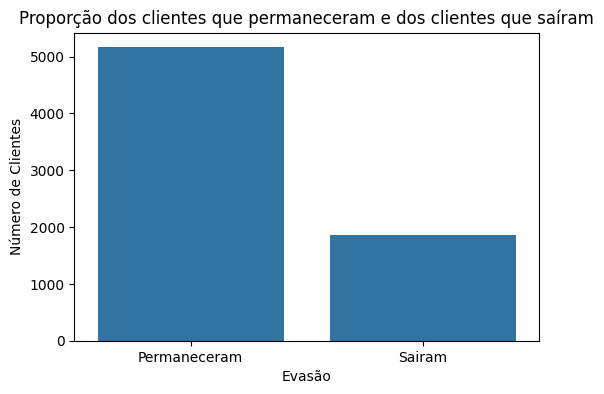

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=dados)
plt.title('Propor√ß√£o dos clientes que permaneceram e dos clientes que sa√≠ram')
plt.xlabel('Evas√£o')
plt.ylabel('N√∫mero de Clientes')
plt.xticks([0, 1], ['Permaneceram', 'Sairam'])
plt.show()

## An√°lise da Rela√ß√£o entre Vari√°veis Categ√≥ricas e a Evas√£o

### Subtask:
Identificar colunas categ√≥ricas e visualizar a distribui√ß√£o das evas√µes dentro de cada categoria.

In [103]:
categorical_cols = dados.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

print("Colunas categ√≥ricas para an√°lise:", categorical_cols)

Colunas categ√≥ricas para an√°lise: ['MultipleLinesStatus', 'InternetServiceType', 'OnlineSecurityStatus', 'OnlineBackupStatus', 'DeviceProtectionStatus', 'TechSupportStatus', 'StreamingTVStatus', 'StreamingMoviesStatus', 'ContractType', 'PaymentMethodType']


### Subtask:
Visualizar a distribui√ß√£o de evas√£o para cada coluna categ√≥rica.

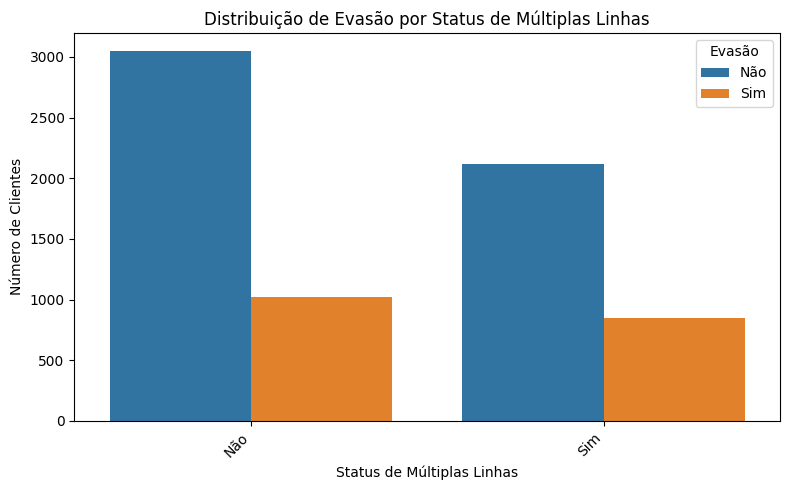

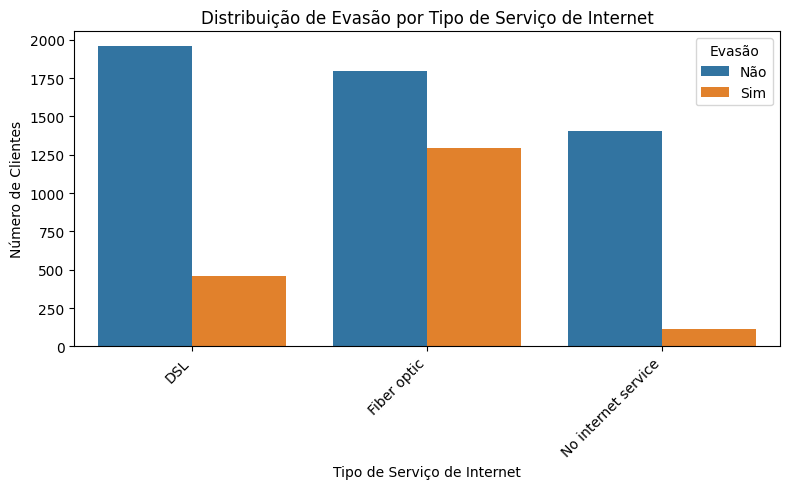

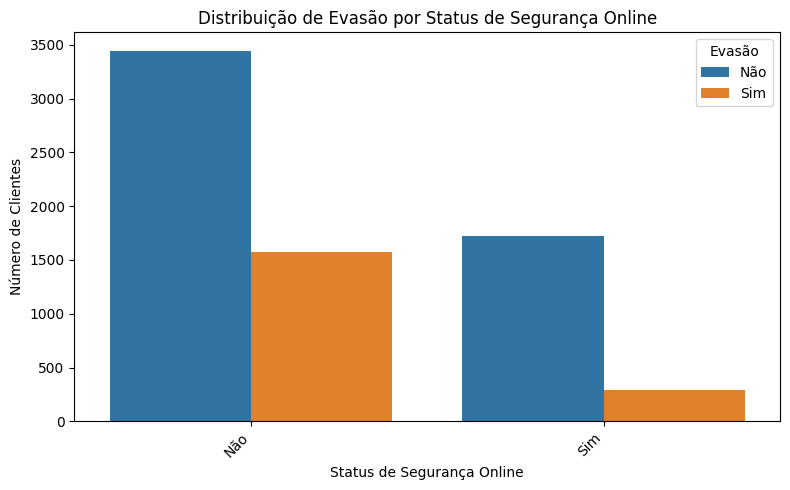

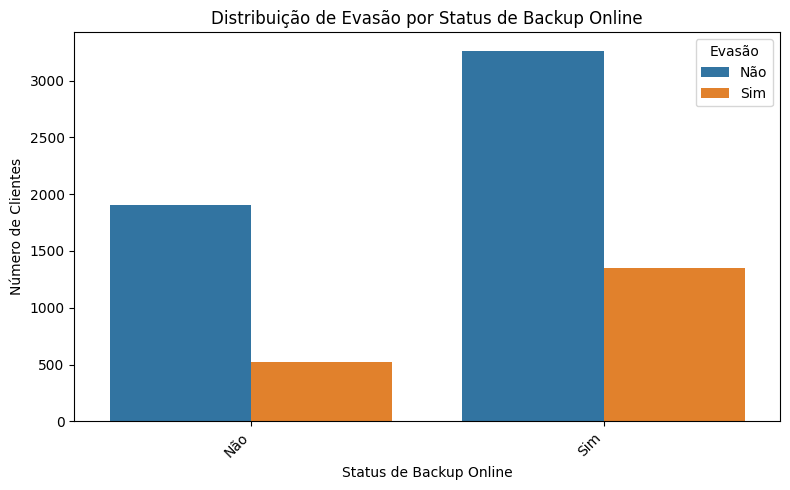

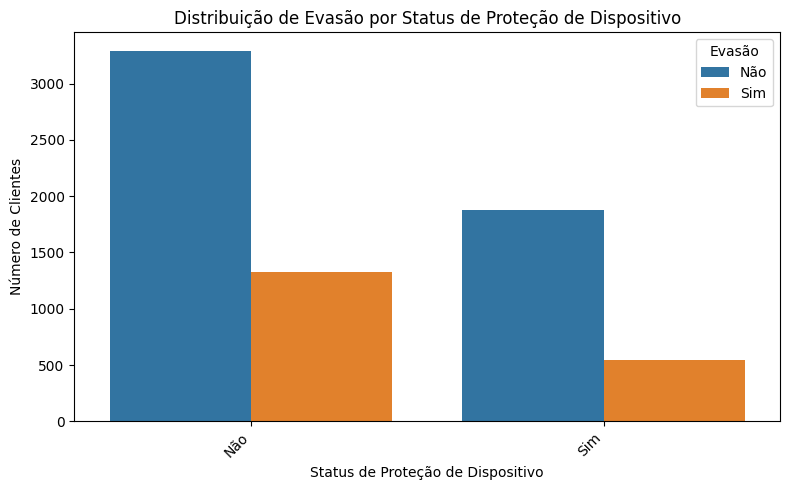

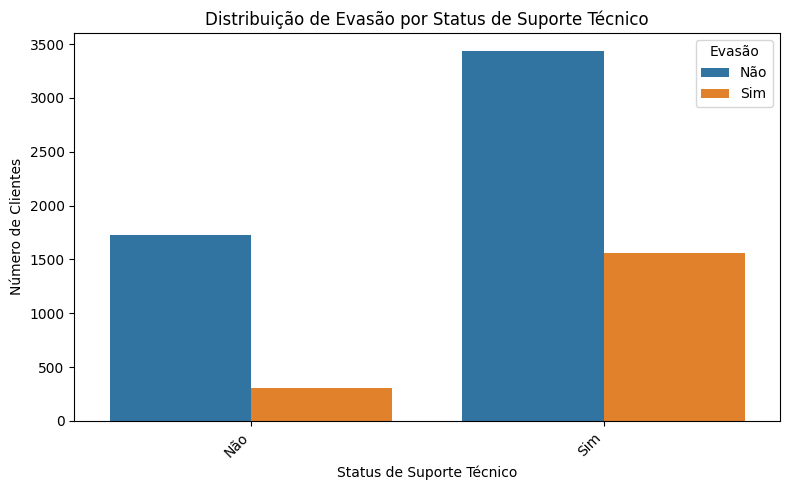

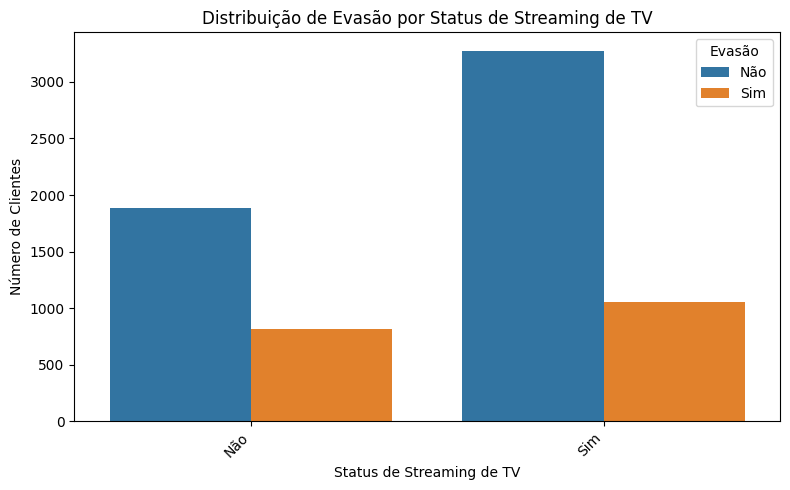

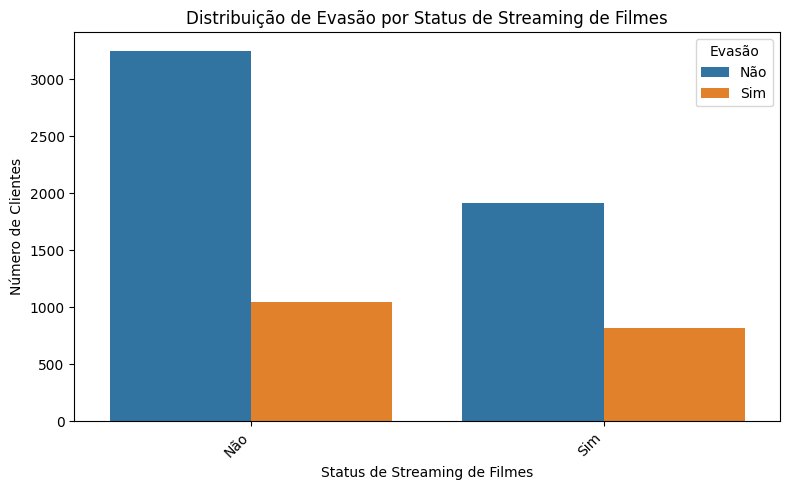

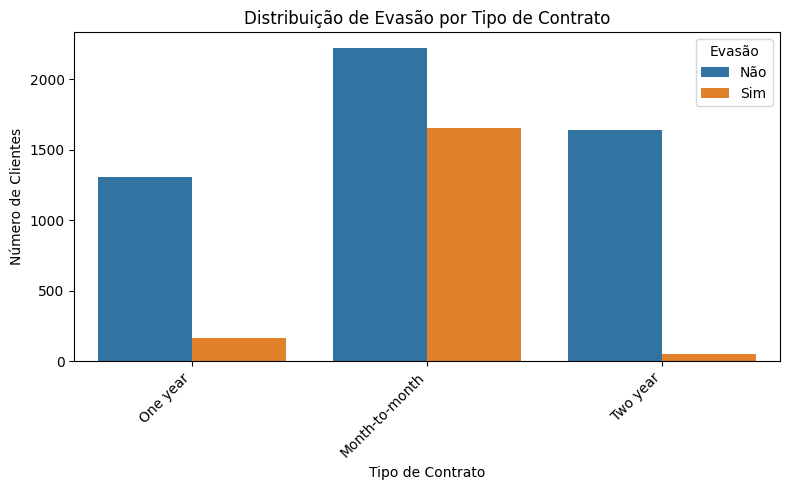

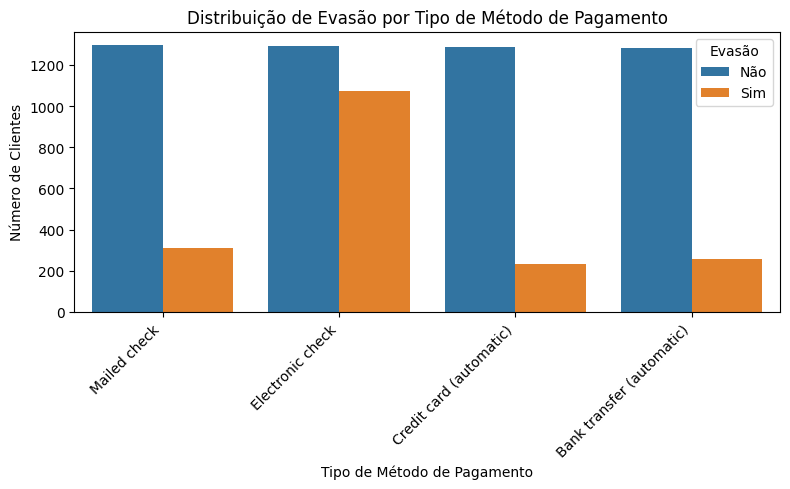

In [104]:
column_translation_mapping = {
    'MultipleLinesStatus': 'Status de M√∫ltiplas Linhas',
    'InternetServiceType': 'Tipo de Servi√ßo de Internet',
    'OnlineSecurityStatus': 'Status de Seguran√ßa Online',
    'OnlineBackupStatus': 'Status de Backup Online',
    'DeviceProtectionStatus': 'Status de Prote√ß√£o de Dispositivo',
    'TechSupportStatus': 'Status de Suporte T√©cnico',
    'StreamingTVStatus': 'Status de Streaming de TV',
    'StreamingMoviesStatus': 'Status de Streaming de Filmes',
    'ContractType': 'Tipo de Contrato',
    'PaymentMethodType': 'Tipo de M√©todo de Pagamento'
}

churn_hue_mapping = {0: 'N√£o', 1: 'Sim'}

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=col, hue='Churn', data=dados)

    translated_title = column_translation_mapping.get(col, col)
    plt.title(f'Distribui√ß√£o de Evas√£o por {translated_title}')


    translated_xlabel = column_translation_mapping.get(col, col)
    plt.xlabel(translated_xlabel)

    plt.ylabel('N√∫mero de Clientes')
    plt.xticks(rotation=45, ha='right')


    if col in ['MultipleLinesStatus', 'OnlineSecurityStatus', 'OnlineBackupStatus', 'DeviceProtectionStatus', 'TechSupportStatus', 'StreamingTVStatus', 'StreamingMoviesStatus', 'PaperlessBilling', 'HasPhoneService', 'HasPartner', 'HasDependents']:
        plt.xticks([0, 1], ['N√£o', 'Sim'], rotation=45, ha='right')
    elif col == 'gender':
         plt.xticks([0, 1], ['Feminino', 'Masculino'], rotation=45, ha='right')


    handles, labels = ax.get_legend_handles_labels()
    sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1]))
    sorted_handles, sorted_labels = zip(*sorted_handles_labels)

    translated_labels = [churn_hue_mapping[int(label)] for label in sorted_labels]

    plt.legend(sorted_handles, translated_labels, title='Evas√£o')


    plt.tight_layout()
    plt.show()

## An√°lise da Rela√ß√£o entre Vari√°veis Num√©ricas e evas√£o

### Subtask:
Visualizar a distribui√ß√£o de vari√°veis num√©ricas ('TenureMonths', 'MonthlyCharges', 'TotalCharges', 'DailyCharges') para clientes com e sem Churn.

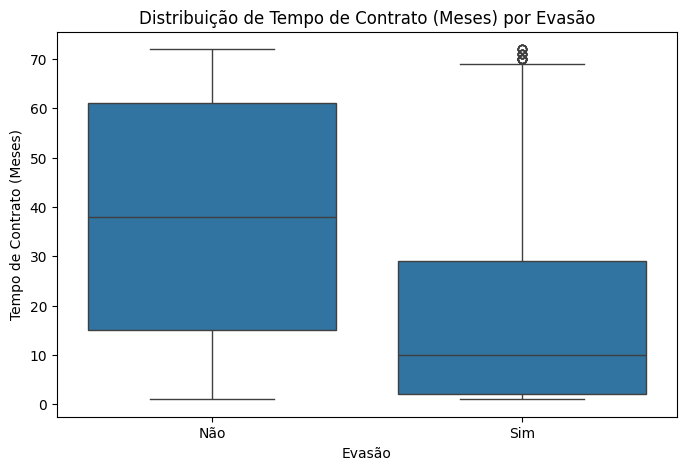

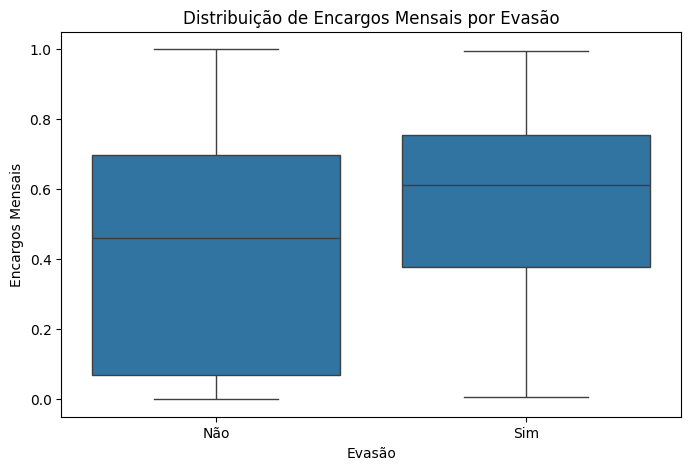

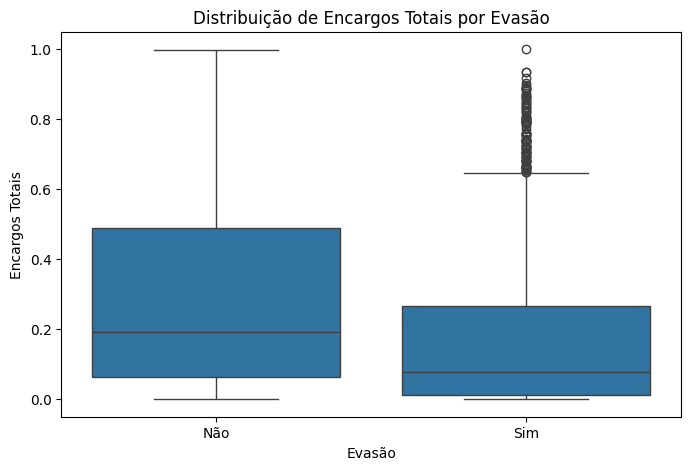

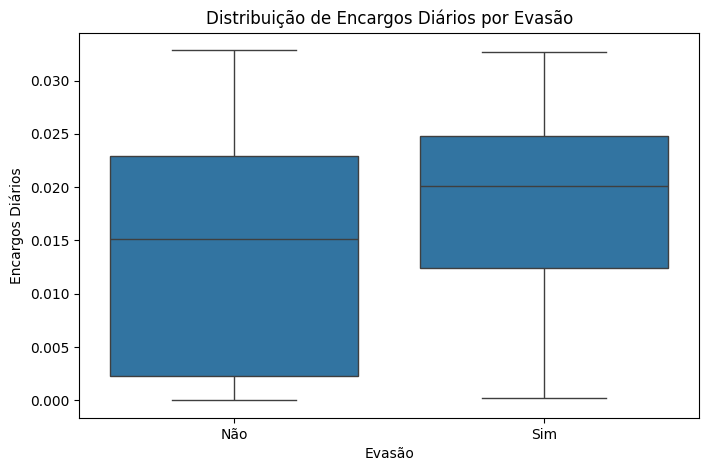

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols_to_analyze = ['TenureMonths', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']

numerical_column_translation_mapping = {
    'TenureMonths': 'Tempo de Contrato (Meses)',
    'MonthlyCharges': 'Encargos Mensais',
    'TotalCharges': 'Encargos Totais',
    'DailyCharges': 'Encargos Di√°rios'
}


for col in numerical_cols_to_analyze:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=dados)


    translated_col_name = numerical_column_translation_mapping.get(col, col)
    plt.title(f'Distribui√ß√£o de {translated_col_name} por Evas√£o')
    plt.xlabel('Evas√£o')
    plt.ylabel(translated_col_name)

    plt.xticks([0, 1], ['N√£o', 'Sim'])
    plt.show()

# üìä Relat√≥rio de An√°lise de Evas√£o de Clientes

## Introdu√ß√£o

Este relat√≥rio apresenta uma an√°lise do fen√¥meno de evas√£o de clientes em uma empresa de telecomunica√ß√µes. O objetivo principal √© investigar os fatores que contribuem para que os clientes cancelem seus servi√ßos, a fim de identificar padr√µes e obter insights que possam auxiliar na redu√ß√£o dessa taxa.

A compreens√£o da evas√£o √© de suma import√¢ncia para empresas do setor de telecomunica√ß√µes, pois a aquisi√ß√£o de novos clientes geralmente envolve custos significativamente mais altos do que a reten√ß√£o dos clientes existentes. Ao identificar os motivos por tr√°s da evas√£o, a empresa pode desenvolver estrat√©gias mais eficazes para reter seus clientes e, consequentemente, otimizar seus recursos e aumentar a lucratividade.

A an√°lise foi realizada utilizando um conjunto de dados que cont√©m informa√ß√µes sobre o perfil dos clientes, os servi√ßos que eles utilizam, e o hist√≥rico de pagamentos.

## Limpeza e Tratamento de Dados

Nesta fase, focamos em preparar o conjunto de dados para an√°lise, garantindo sua qualidade e formato adequados. Os principais passos realizados foram:

*   **Importa√ß√£o dos Dados**: Os dados foram carregados a partir de um arquivo JSON disponibilizado online, utilizando a biblioteca pandas.
*   **Normaliza√ß√£o de Dados Aninhados**: As colunas que continham dados aninhados ('customer', 'phone', 'internet', 'account') foram normalizadas utilizando `pd.json_normalize`. Isso extraiu as informa√ß√µes aninhadas em novas colunas no DataFrame principal.
*   **Remo√ß√£o de Colunas Aninhadas Originais**: As colunas originais com dados aninhados foram removidas ap√≥s a extra√ß√£o para evitar redund√¢ncia.
*   **Tratamento de Valores N√£o Num√©ricos**: Identificamos que a coluna 'Charges.Total' continha valores n√£o num√©ricos (' '). Realizamos a convers√£o dessa coluna para o tipo num√©rico, tratando os erros como valores ausentes (`errors='coerce'`).
*   **Tratamento de Valores Ausentes**: Removemos as linhas que apresentavam valores ausentes (resultantes do passo anterior) nas colunas 'Charges.Total' e 'Charges.Monthly'.
*   **Verifica√ß√£o de Duplicados**: Checamos a exist√™ncia de linhas duplicadas no DataFrame, e nenhuma duplicidade foi encontrada.
*   **Tratamento de Inconsist√™ncias na Coluna 'Churn'**: Identificamos a presen√ßa de valores vazios ('') na coluna 'Churn'. Removemos as linhas correspondentes para garantir que a coluna contivesse apenas 'Yes' ou 'No'.
*   **Cria√ß√£o da Coluna "Contas_Diarias"**: Calculamos o valor di√°rio aproximado do faturamento dividindo a coluna 'Charges.Monthly' pelo n√∫mero m√©dio de dias em um m√™s (30.44), criando a nova feature 'Contas_Diarias'.
*   **Convers√£o de Colunas Bin√°rias**: Identificamos colunas com valores bin√°rios (como 'Yes'/'No', 'Male'/'Female') e as convertemos para representa√ß√£o num√©rica (1 e 0) para facilitar a modelagem.
*   **Renomea√ß√£o de Colunas**: Renomeamos v√°rias colunas para torn√°-las mais intuitivas e f√°ceis de entender.
*   **Padroniza√ß√£o de Valores Categ√≥ricos**: Padronizamos alguns valores dentro de colunas categ√≥ricas para garantir consist√™ncia (ex: 'No internet service' e 'No phone service' para 'No' onde apropriado).

Esses passos garantiram que o conjunto de dados estivesse limpo, consistente e pronto para a fase de an√°lise explorat√≥ria.

## An√°lise Explorat√≥ria de Dados (AED)

A fase de An√°lise Explorat√≥ria de Dados teve como objetivo entender a distribui√ß√£o das vari√°veis e identificar poss√≠veis rela√ß√µes entre elas e a vari√°vel de interesse, a evas√£o.

### An√°lise Descritiva

Realizamos uma an√°lise descritiva das colunas num√©ricas para entender suas principais estat√≠sticas (m√©dia, mediana, desvio padr√£o, etc.) e obtivemos informa√ß√µes gerais sobre o DataFrame, incluindo tipos de dados e valores n√£o nulos.

**Resultados:** Consulte a sa√≠da da c√©lula `c301c350` para os detalhes da an√°lise descritiva e `dados.info()`.

### Distribui√ß√£o da Vari√°vel Churn

Visualizamos a propor√ß√£o de clientes que permaneceram e dos que evadiram utilizando um gr√°fico de contagem.

**Resultados:** Observe o gr√°fico gerado na c√©lula `10281778` para a distribui√ß√£o do Churn.

### Rela√ß√£o entre Vari√°veis Categ√≥ricas e Churn

Exploramos como a evas√£o se distribui entre as diferentes categorias das vari√°veis categ√≥ricas. Criamos gr√°ficos de contagem para cada coluna categ√≥rica para visualizar essa rela√ß√£o.

**Resultados:** Veja os gr√°ficos gerados na c√©lula `6713fcc1` que mostram a distribui√ß√£o de evas√£o por Status de M√∫ltiplas Linhas, Tipo de Servi√ßo de Internet, Seguran√ßa Online, Backup Online, Prote√ß√£o de Dispositivo, Suporte T√©cnico, Streaming de TV, Streaming de Filmes, Tipo de Contrato e Tipo de M√©todo de Pagamento.

### Rela√ß√£o entre Vari√°veis Num√©ricas e Churn

Analisamos a distribui√ß√£o de vari√°veis num√©ricas como Tempo de Contrato (Meses), Encargos Mensais, Encargos Totais e Encargos Di√°rios para clientes que evadiram e os que n√£o evadiram utilizando box plots.

**Resultados:** Os box plots na c√©lula `a1094af7` ilustram a distribui√ß√£o dessas vari√°veis num√©ricas em rela√ß√£o a evas√£o dos clientes.

## Conclus√µes e Insights

Com base na An√°lise Explorat√≥ria de Dados, podemos tirar algumas conclus√µes e obter insights importantes sobre os fatores que influenciam a evas√£o de clientes:

*   **Tempo de Contrato (TenureMonths):** Clientes com menor tempo de contrato (TenureMonths) parecem ter uma tend√™ncia maior a cancelar o servi√ßo. O box plot da c√©lula `a1094af7` para 'TenureMonths' mostra que a mediana e o terceiro quartil s√£o significativamente menores para clientes que evadiram em compara√ß√£o com os que permaneceram.
*   **Encargos Mensais (MonthlyCharges):** Clientes com encargos mensais mais altos parecem ter uma maior probabilidade de evas√£o. O box plot da c√©lula `a1094af7` para 'MonthlyCharges' indica que a distribui√ß√£o dos encargos mensais √© mais alta para o grupo de clientes que evadiram.
*   **Tipo de Contrato (ContractType):** Clientes com contratos mensais ('Month-to-month') apresentam uma taxa de evas√£o consideravelmente maior em compara√ß√£o com aqueles com contratos de um ou dois anos. Os gr√°ficos da c√©lula `6713fcc1` para 'ContractType' ilustram claramente essa diferen√ßa. Contratos de longo prazo parecem ser um fator importante na reten√ß√£o de clientes.
*   **Servi√ßo de Internet (InternetServiceType):** Clientes com servi√ßo de internet do tipo 'Fiber optic' parecem ter uma taxa de evas√£o maior do que aqueles com 'DSL' ou sem servi√ßo de internet. Isso pode indicar problemas de qualidade ou custo associados a esse tipo de servi√ßo. Consulte os gr√°ficos da c√©lula `6713fcc1` para 'InternetServiceType'.
*   **Servi√ßos Adicionais (OnlineSecurityStatus, TechSupportStatus, etc.):** Clientes que n√£o utilizam servi√ßos adicionais como Seguran√ßa Online, Backup Online, Prote√ß√£o de Dispositivo e Suporte T√©cnico parecem ter uma maior propens√£o a cancelar. Os gr√°ficos da c√©lula `6713fcc1` para essas colunas ('OnlineSecurityStatus', 'OnlineBackupStatus', 'DeviceProtectionStatus', 'TechSupportStatus') mostram que a propor√ß√£o de evas√£o √© maior para a categoria 'No'. Isso sugere que esses servi√ßos podem ser importantes para a reten√ß√£o.
*   **M√©todo de Pagamento (PaymentMethodType):** O m√©todo de pagamento 'Electronic check' parece estar associado a uma taxa de evas√£o mais alta em compara√ß√£o com outros m√©todos. Veja os gr√°ficos da c√©lula `6713fcc1` para 'PaymentMethodType'.
*   **Clientes Idosos (IsSeniorCitizen):** Clientes idosos (SeniorCitizen = 1) parecem ter uma taxa de evas√£o ligeiramente maior, embora a diferen√ßa n√£o seja t√£o pronunciada quanto outros fatores. Consulte os gr√°ficos da c√©lula `6713fcc1` para 'IsSeniorCitizen'.
*   **Parceiros e Dependentes (HasPartner, HasDependents):** Clientes sem parceiros ou dependentes parecem ter uma taxa de evas√£o um pouco maior. Os gr√°ficos da c√©lula `6713fcc1` para 'HasPartner' e 'HasDependents' mostram essa tend√™ncia.

Esses insights sugerem que a dura√ß√£o do contrato, o tipo de servi√ßo de internet, a utiliza√ß√£o de servi√ßos de seguran√ßa e suporte, o m√©todo de pagamento e os encargos mensais s√£o fatores importantes a serem considerados ao analisar e tentar reduzir a evas√£o de clientes.